In [28]:
#Importando as bibliotecas necessárias

import matplotlib.pyplot as plt
import pandas as pd

In [29]:
#Lendo arquivos do excel

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [30]:
#Concatenando e convertendo coluna data para o tipo datatime

df_todos = pd.concat([df1, df2, df3, df4, df5])
df_todos["Data"] = pd.to_datetime(df_todos["Data"])
print(df_todos)

       Cidade       Data  Vendas  LojaID  Qtde
0     Aracaju 2018-01-01  142.00    1520     1
1     Aracaju 2018-01-01   14.21    1522     6
2     Aracaju 2018-01-01   71.55    1520     1
3     Aracaju 2018-01-01    3.01    1521     7
4     Aracaju 2018-01-01   24.51    1522     8
..        ...        ...     ...     ...   ...
235  Salvador 2019-01-03   41.84    1034     1
236  Salvador 2019-01-03  126.29    1035     3
237  Salvador 2019-01-03   38.06    1036     3
238  Salvador 2019-01-03  139.64    1035     1
239  Salvador 2019-01-03  161.41    1037     3

[894 rows x 5 columns]


In [31]:
#Criando uma coluna de receita gerada.

df_todos["LojaID"] = df_todos["LojaID"].astype("object")
df_todos["Receita"] = df_todos["Vendas"].mul(df_todos["Qtde"])
print(df_todos)

       Cidade       Data  Vendas LojaID  Qtde  Receita
0     Aracaju 2018-01-01  142.00   1520     1   142.00
1     Aracaju 2018-01-01   14.21   1522     6    85.26
2     Aracaju 2018-01-01   71.55   1520     1    71.55
3     Aracaju 2018-01-01    3.01   1521     7    21.07
4     Aracaju 2018-01-01   24.51   1522     8   196.08
..        ...        ...     ...    ...   ...      ...
235  Salvador 2019-01-03   41.84   1034     1    41.84
236  Salvador 2019-01-03  126.29   1035     3   378.87
237  Salvador 2019-01-03   38.06   1036     3   114.18
238  Salvador 2019-01-03  139.64   1035     1   139.64
239  Salvador 2019-01-03  161.41   1037     3   484.23

[894 rows x 6 columns]


In [32]:
#Criando colunas de ano, dia e mês

df_todos["Ano"] = df_todos["Data"].dt.year
df_todos["Mês"] = df_todos["Data"].dt.month
df_todos["Dia"] = df_todos["Data"].dt.day
print(df_todos)

       Cidade       Data  Vendas LojaID  Qtde  Receita   Ano  Mês  Dia
0     Aracaju 2018-01-01  142.00   1520     1   142.00  2018    1    1
1     Aracaju 2018-01-01   14.21   1522     6    85.26  2018    1    1
2     Aracaju 2018-01-01   71.55   1520     1    71.55  2018    1    1
3     Aracaju 2018-01-01    3.01   1521     7    21.07  2018    1    1
4     Aracaju 2018-01-01   24.51   1522     8   196.08  2018    1    1
..        ...        ...     ...    ...   ...      ...   ...  ...  ...
235  Salvador 2019-01-03   41.84   1034     1    41.84  2019    1    3
236  Salvador 2019-01-03  126.29   1035     3   378.87  2019    1    3
237  Salvador 2019-01-03   38.06   1036     3   114.18  2019    1    3
238  Salvador 2019-01-03  139.64   1035     1   139.64  2019    1    3
239  Salvador 2019-01-03  161.41   1037     3   484.23  2019    1    3

[894 rows x 9 columns]


In [33]:
#Filtrando as vendas do dia 2 de março de 2019 na cidade de Fortaleza e Fazendo um gráfico (Relatório).
#Relação de LojaID x Receita gerada
#Podendo mudar o filtro à vontade.
#Se for inserido "0" na variável dia, será considerado apenas o mês e ano.
#Se for inserido "0" na variável mês, será considerado apenas o ano, independente do valor inserido na variável dia.

ano = 2019
mes = 3
dia = 2
cidade = "Fortaleza"

data: str
data2: str

if dia < 10:
    data = '0'
else:
    data = ""
if mes < 10:
    data2 = '0'
else:
    data2 = ""


df2_filtro = df_todos.loc[(df_todos["Data"].dt.year == ano) & (df_todos["Data"].dt.month == mes) & (df_todos["Data"].dt.day == dia)]
df2_filtro = df2_filtro.loc[df2_filtro["Cidade"] == f"{cidade}"]

msg_toda = f"Receita gerada em {data}{dia}/{data2}{mes}/{ano} em {cidade}"

if dia == 0:
    msg_toda = f"Receita gerada em {data2}{mes}/{ano} em {cidade}"
    df2_filtro = df_todos.loc[(df_todos["Data"].dt.year == ano) & (df_todos["Data"].dt.month == mes)]
    df2_filtro = df2_filtro.loc[df2_filtro["Cidade"] == f"{cidade}"]
    if mes == 0:
        msg_toda = f"Receita gerada em {ano} em {cidade}"
        df2_filtro = df_todos.loc[(df_todos["Data"].dt.year == ano)]
        df2_filtro = df2_filtro.loc[df2_filtro["Cidade"] == f"{cidade}"]

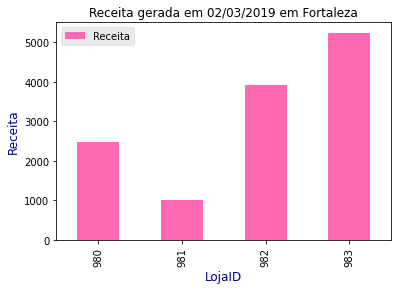

In [34]:
#Montando e personalizando o gráfico

df2_filtro.groupby("LojaID")["Receita"].sum().plot.bar(title=f"{msg_toda}", color="hotpink")
plt.style.use("ggplot")
plt.legend(loc='best')
plt.xlabel("LojaID", color="darkblue", fontsize='large')
plt.ylabel("Receita", color="darkblue", fontsize='large')
plt.show()
